In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [51]:
ballot_distributions = [("geometric", 2), ("geometric", 3), ("geometric", 4), \
    ("hypersphere", 2), ("hypersphere", 3), ("hypersphere", 4), \
    ("uniform", ), ("polya_eggenberger", 1), ("polya_eggenberger", 2), \
    ("polya_eggenberger", 5), ("polya_eggenberger", 10)]

     Borda  plurality     IRV    d    m
0   0.5698     2.4318  0.9112  2.0  3.0
1   0.7396     4.8964  1.7592  2.0  4.0
2   0.8376     7.5662  2.9794  2.0  5.0
3   0.8792     9.8680  4.0644  2.0  6.0
4   0.3142     1.6894  0.4656  3.0  3.0
5   0.5042     3.4060  0.9158  3.0  4.0
6   0.5576     5.1408  1.2896  3.0  5.0
7   0.6288     6.9024  1.8368  3.0  6.0
8   0.2126     1.1814  0.2770  4.0  3.0
9   0.3374     2.6848  0.5744  4.0  4.0
10  0.4404     3.7626  0.8102  4.0  5.0
11  0.4736     5.1072  1.0200  4.0  6.0


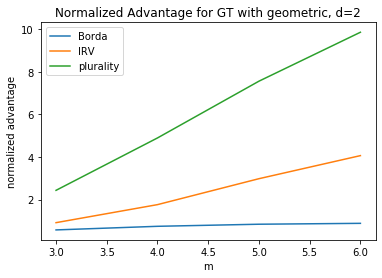

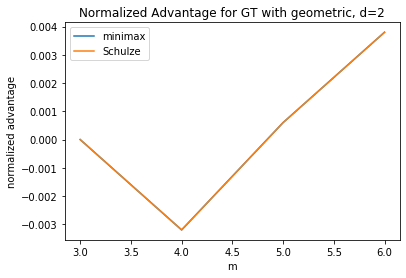

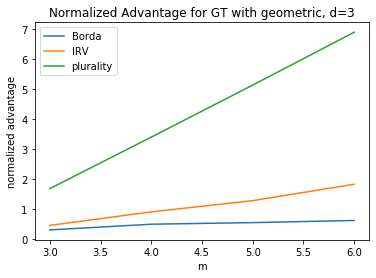

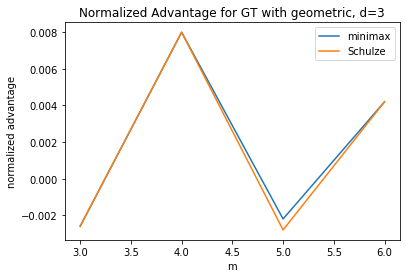

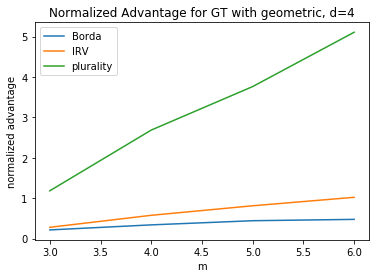

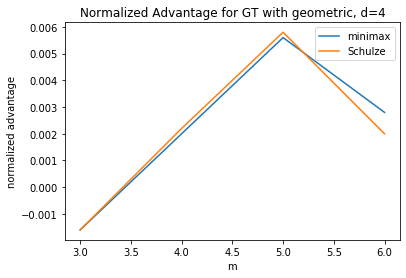

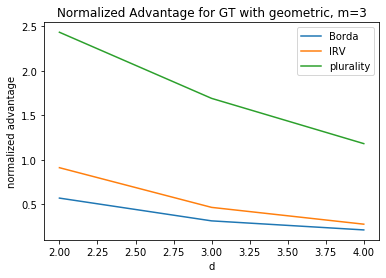

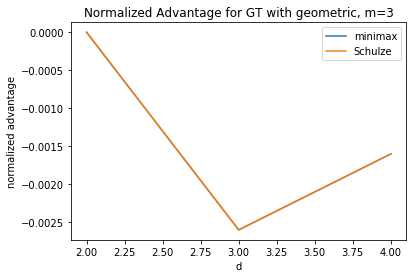

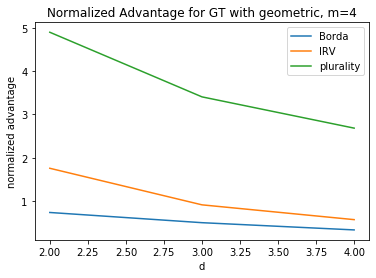

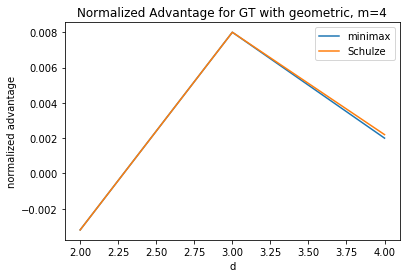

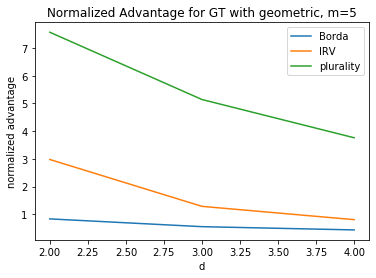

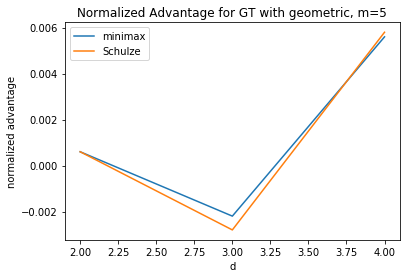

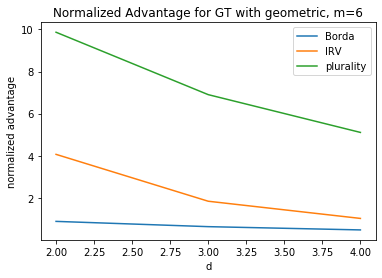

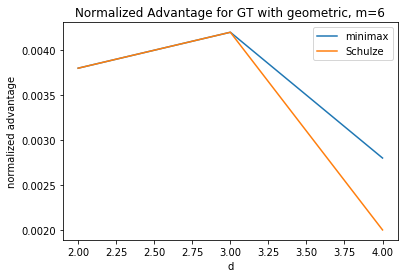

In [76]:
non_condorcet = ['Borda', 'plurality', 'IRV', 'd', 'm']
condorcet = ['minimax', 'Schulze', 'd', 'm']
df_non_condorcet = pd.DataFrame(columns=non_condorcet)
df_condorcet = pd.DataFrame(columns=condorcet)
distribution = ("geometric", i)

for d in range(2,5):
    for m in range(3,7):
        plt_dir = "results/distributions/" + str(distribution[0]) + "/d_" + str(d) + "/m_" + str(m) + "/"
        
        df = pd.read_csv(plt_dir + 'Nmargins.csv', index_col = 0)
        df_gt = df.loc[["gt"]]
        df_gt = df_gt/10000
        #print(df_gt)
        #print([df_gt["minimax"]["gt"], df_gt["Schulze"]["gt"]])
        df_condorcet.loc[len(df_condorcet)] = [df_gt["minimax"]["gt"], df_gt["Schulze"]["gt"], d, m]
        df_non_condorcet.loc[len(df_non_condorcet)] = [df_gt["Borda"]["gt"], df_gt["plurality"]["gt"], 
                                                       df_gt["IRV"]["gt"], d, m]
    #plt.plot()
print(df_non_condorcet)



for d in [2,3,4]:
    #print(d)
    df_to_plot = df_non_condorcet[df_non_condorcet['d'] == d]
    plt.plot(df_to_plot['m'], df_to_plot['Borda'], label='Borda')
    plt.plot(df_to_plot['m'], df_to_plot['IRV'], label='IRV')
    plt.plot(df_to_plot['m'], df_to_plot['plurality'], label='plurality')
    plt.xlabel("m")
    plt.ylabel("normalized advantage")
    plt.title("Normalized Advantage for GT with {}, d={}".format(distribution[0], d))
    plt.legend()
    #plt.show()
    save_dir = "plots/distributions/{}/".format(distribution[0]) 
    if not os.path.exists(save_dir): os.makedirs(save_dir)
    plt.savefig(save_dir + "varying_m_non_condorcet_d_{}.png".format(d))
    plt.show()
    
    df_to_plot = df_condorcet[df_condorcet['d'] == d]
    plt.plot(df_to_plot['m'], df_to_plot['minimax'], label='minimax')
    plt.plot(df_to_plot['m'], df_to_plot['Schulze'], label='Schulze')
    plt.xlabel("m")
    plt.ylabel("normalized advantage")
    plt.title("Normalized Advantage for GT with {}, d={}".format(distribution[0], d))
    plt.legend()
    #plt.show()
    save_dir = "plots/distributions/{}/".format(distribution[0]) 
    if not os.path.exists(save_dir): os.makedirs(save_dir)
    plt.savefig(save_dir + "varying_m_condorcet_d_{}.png".format(d))
    plt.show()
    
    
for m in [3,4,5,6]:
    #print(d)
    df_to_plot = df_non_condorcet[df_non_condorcet['m'] == m]
    plt.plot(df_to_plot['d'], df_to_plot['Borda'], label='Borda')
    plt.plot(df_to_plot['d'], df_to_plot['IRV'], label='IRV')
    plt.plot(df_to_plot['d'], df_to_plot['plurality'], label='plurality')
    plt.xlabel("d")
    plt.ylabel("normalized advantage")
    plt.title("Normalized Advantage for GT with {}, m={}".format(distribution[0], m))
    plt.legend()
    save_dir = "plots/distributions/{}/".format(distribution[0])
    if not os.path.exists(save_dir): os.makedir(save_dir)
    plt.savefig(save_dir + "varying_d_non_condorcet_m_{}.png".format(m))
    plt.show()
    
    df_to_plot = df_condorcet[df_condorcet['m'] == m]
    plt.plot(df_to_plot['d'], df_to_plot['minimax'], label='minimax')
    plt.plot(df_to_plot['d'], df_to_plot['Schulze'], label='Schulze')
    #plt.plot(df_to_plot['d'], df_to_plot['plurality'], label='plurality')
    plt.xlabel("d")
    plt.ylabel("normalized advantage")
    plt.title("Normalized Advantage for GT with {}, m={}".format(distribution[0], m))
    plt.legend()
    save_dir = "plots/distributions/{}/".format(distribution[0])
    if not os.path.exists(save_dir): os.makedir(save_dir)
    plt.savefig(save_dir + "varying_d_condorcet_m_{}.png".format(m))
    plt.show()



     Borda  plurality     IRV  alpha    m
0   0.5900     0.9326  0.3254    1.0  3.0
1   0.4848     1.7782  0.4926    1.0  4.0
2   0.3152     1.9686  0.4776    1.0  5.0
3   0.2820     2.1200  0.5204    1.0  6.0
4   0.7520     0.6466  0.2624    2.0  3.0
5   0.7370     1.8730  0.5350    2.0  4.0
6   0.4412     2.1574  0.5360    2.0  5.0
7   0.2892     2.2678  0.5134    2.0  6.0
8   0.7226     0.3270  0.2064    5.0  3.0
9   1.1834     1.3424  0.6468    5.0  4.0
10  0.6786     2.4496  0.8042    5.0  5.0
11  0.4408     2.4556  0.6382    5.0  6.0
12  0.5698     0.1508  0.1154   10.0  3.0
13  1.5898     0.9596  0.5506   10.0  4.0
14  1.0344     2.3508  0.8822   10.0  5.0
15  0.4126     2.5600  0.6768   10.0  6.0
    Borda  plurality     IRV  alpha    m
0  0.5900     0.9326  0.3254    1.0  3.0
1  0.4848     1.7782  0.4926    1.0  4.0
2  0.3152     1.9686  0.4776    1.0  5.0
3  0.2820     2.1200  0.5204    1.0  6.0


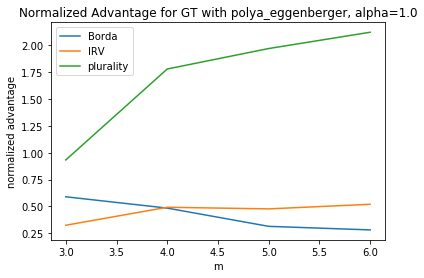

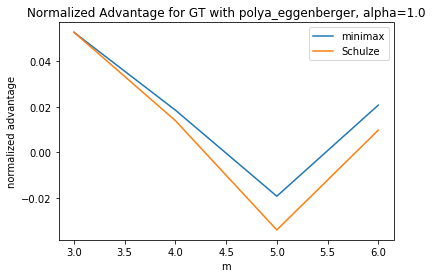

    Borda  plurality     IRV  alpha    m
4  0.7520     0.6466  0.2624    2.0  3.0
5  0.7370     1.8730  0.5350    2.0  4.0
6  0.4412     2.1574  0.5360    2.0  5.0
7  0.2892     2.2678  0.5134    2.0  6.0


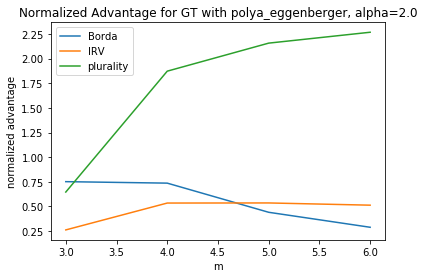

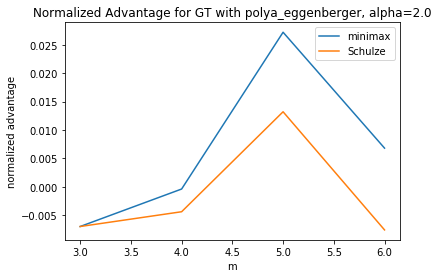

     Borda  plurality     IRV  alpha    m
8   0.7226     0.3270  0.2064    5.0  3.0
9   1.1834     1.3424  0.6468    5.0  4.0
10  0.6786     2.4496  0.8042    5.0  5.0
11  0.4408     2.4556  0.6382    5.0  6.0


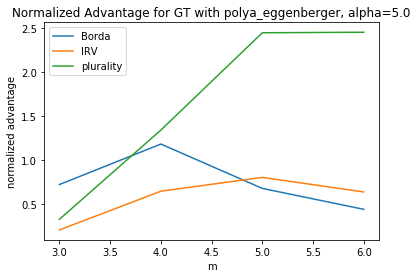

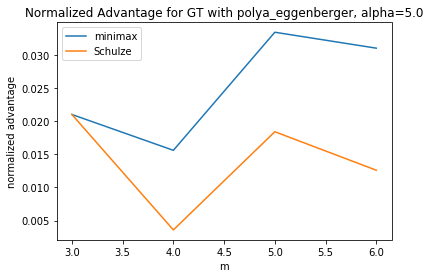

     Borda  plurality     IRV  alpha    m
12  0.5698     0.1508  0.1154   10.0  3.0
13  1.5898     0.9596  0.5506   10.0  4.0
14  1.0344     2.3508  0.8822   10.0  5.0
15  0.4126     2.5600  0.6768   10.0  6.0


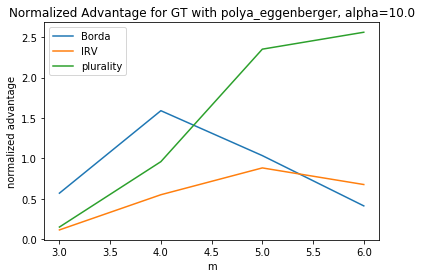

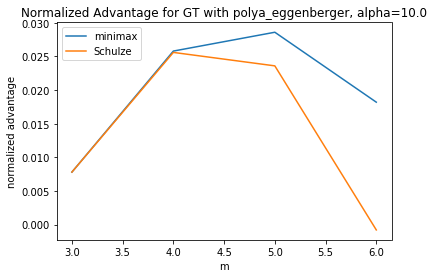

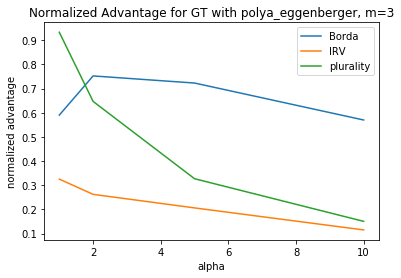

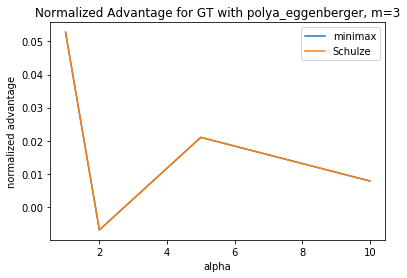

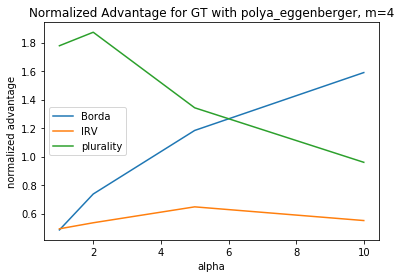

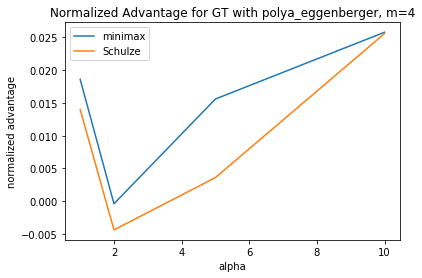

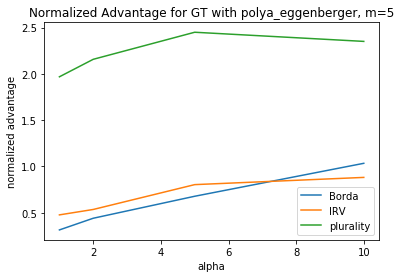

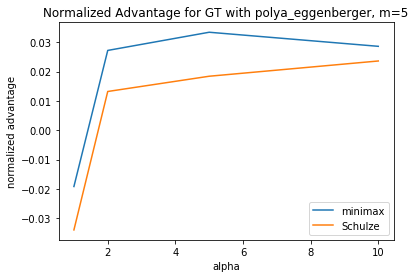

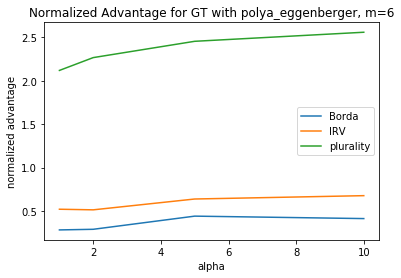

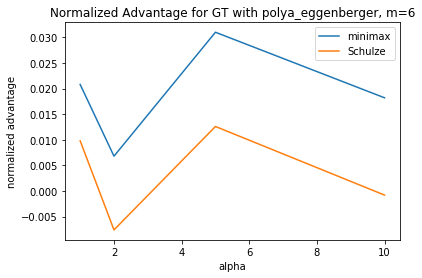

In [77]:
non_condorcet = ['Borda', 'plurality', 'IRV', 'alpha', 'm']
condorcet = ['minimax', 'Schulze', 'alpha', 'm']
df_non_condorcet = pd.DataFrame(columns=non_condorcet)
df_condorcet = pd.DataFrame(columns=condorcet)
distribution = ("polya_eggenberger", 1)

for alpha in [1, 2, 5, 10]:
    for m in range(3,7):
        plt_dir = "results/distributions/" + str(distribution[0]) + "/alpha_" + str(alpha) + "/m_" + str(m) + "/"
        
        df = pd.read_csv(plt_dir + 'Nmargins.csv', index_col = 0)
        df_gt = df.loc[["gt"]]
        df_gt = df_gt/10000
        #print(df_gt)
        #print([df_gt["minimax"]["gt"], df_gt["Schulze"]["gt"]])
        df_condorcet.loc[len(df_condorcet)] = [df_gt["minimax"]["gt"], df_gt["Schulze"]["gt"], alpha, m]
        df_non_condorcet.loc[len(df_non_condorcet)] = [df_gt["Borda"]["gt"], df_gt["plurality"]["gt"], 
                                                       df_gt["IRV"]["gt"], alpha, m]
    #plt.plot()
print(df_non_condorcet)



for alpha in [1.0,2.0,5.0,10.0]:
    #print(d)
    #print(df_non_condorcet)
    df_to_plot = df_non_condorcet[df_non_condorcet['alpha'] == alpha]
    print(df_to_plot)
    plt.plot(df_to_plot['m'], df_to_plot['Borda'], label='Borda')
    plt.plot(df_to_plot['m'], df_to_plot['IRV'], label='IRV')
    plt.plot(df_to_plot['m'], df_to_plot['plurality'], label='plurality')
    plt.xlabel("m")
    plt.ylabel("normalized advantage")
    plt.title("Normalized Advantage for GT with {}, alpha={}".format(distribution[0], alpha))
    plt.legend()
    #plt.show()
    save_dir = "plots/distributions/{}/".format(distribution[0]) 
    if not os.path.exists(save_dir): os.makedirs(save_dir)
    plt.savefig(save_dir + "varying_m_non_condorcet_alpha_{}.png".format(alpha))
    plt.show()
    
    df_to_plot = df_condorcet[df_condorcet['alpha'] == alpha]
    plt.plot(df_to_plot['m'], df_to_plot['minimax'], label='minimax')
    plt.plot(df_to_plot['m'], df_to_plot['Schulze'], label='Schulze')
    plt.xlabel("m")
    plt.ylabel("normalized advantage")
    plt.title("Normalized Advantage for GT with {}, alpha={}".format(distribution[0], alpha))
    plt.legend()
    #plt.show()
    save_dir = "plots/distributions/{}/".format(distribution[0]) 
    if not os.path.exists(save_dir): os.makedirs(save_dir)
    plt.savefig(save_dir + "varying_m_condorcet_alpha_{}.png".format(d))
    plt.show()
    
    
for m in [3,4,5,6]:
    #print(d)
    df_to_plot = df_non_condorcet[df_non_condorcet['m'] == m]
    plt.plot(df_to_plot['alpha'], df_to_plot['Borda'], label='Borda')
    plt.plot(df_to_plot['alpha'], df_to_plot['IRV'], label='IRV')
    plt.plot(df_to_plot['alpha'], df_to_plot['plurality'], label='plurality')
    plt.xlabel("alpha")
    plt.ylabel("normalized advantage")
    plt.title("Normalized Advantage for GT with {}, m={}".format(distribution[0], m))
    plt.legend()
    save_dir = "plots/distributions/{}/".format(distribution[0])
    if not os.path.exists(save_dir): os.makedir(save_dir)
    plt.savefig(save_dir + "varying_alpha_non_condorcet_m_{}.png".format(m))
    plt.show()
    
    df_to_plot = df_condorcet[df_condorcet['m'] == m]
    plt.plot(df_to_plot['alpha'], df_to_plot['minimax'], label='minimax')
    plt.plot(df_to_plot['alpha'], df_to_plot['Schulze'], label='Schulze')
    #plt.plot(df_to_plot['alpha'], df_to_plot['plurality'], label='plurality')
    plt.xlabel("alpha")
    plt.ylabel("normalized advantage")
    plt.title("Normalized Advantage for GT with {}, m={}".format(distribution[0], m))
    plt.legend()
    save_dir = "plots/distributions/{}/".format(distribution[0])
    if not os.path.exists(save_dir): os.makedir(save_dir)
    plt.savefig(save_dir + "varying_alpha_condorcet_m_{}.png".format(m))
    plt.show()